In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## ⚙️ **Processamento de Dados e Análise Exploratória** ⚙️

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spark/Telco-Churn.csv')

In [ ]:
print(df.head().to_string())

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe().T

In [ ]:
for col in df.columns:
    print(f"{col}:", df[col].unique(),"\n")

In [ ]:
print(df["DeviceProtection"].unique())

['No' 'Yes' 'No internet service']


In [ ]:
# Transformações essenciais para o funcionamento
df["Churn"] =            df["Churn"].map({"No": 0, "Yes": 1})
df["PhoneService"] =     df["PhoneService"].map({"No": 0, "Yes": 1})
df["MultipleLines"] =    df["MultipleLines"].map({"No": 0, "Yes": 1, "No phone service": 0})
df["InternetService"] =  df["InternetService"].map({"No": 0, "Fiber optic": 1, "DSL": 1})
df["OnlineSecurity"] =   df["OnlineSecurity"].map({"No": 0, "Yes": 1, "No internet service": 0})
df["OnlineBackup"] =     df["OnlineBackup"].map({"No": 0, "Yes": 1, "No internet service": 0})
df["DeviceProtection"] = df["DeviceProtection"].map({"No": 0, "Yes": 1, "No internet service": 0})
df["TechSupport"] =      df["TechSupport"].map({"No": 0, "Yes": 1, "No internet service": 0})
df["StreamingTV"] =      df["StreamingTV"].map({"No": 0, "Yes": 1, "No internet service": 0})
df["StreamingMovies"] =  df["StreamingMovies"].map({"No": 0, "Yes": 1, "No internet service": 0})
df["PaymentMethod"] =    df["PaymentMethod"].map({"Electronic check": 0, "Mailed check": 1, "Bank transfer (automatic)": 2, "Credit card (automatic)": 3})
df["Contract"] =         df["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
df['TotalCharges'] =     pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

In [ ]:
total_churn = (df["Churn"] == 1).sum()
print("Usuários que cometeram Churn:", total_churn)
not_churn = (df["Churn"] == 0).sum()
print("Não cometeram Churn:", not_churn)

Usuários que cometeram Churn: 1869
Não cometeram Churn: 5174


In [ ]:
df_filtrado = df[(df["InternetService"].isin([1,1])) & (df["PhoneService"] == 1)]

# Exibindo o resultado
print(df_filtrado[["InternetService","PhoneService","Churn"]].head(5).to_string())

## 📈 **Insights** 📈

In [ ]:
# Relação entre churn e Contrato (Churn/Contract)
plt.figure(figsize=(5, 5))
corr = df[['Churn', 'Contract']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação: Churn / Tempo do cliente na empresa')
plt.show()

In [ ]:
# Relação entre churn e serviço de Internet (Churn/InternetService)
corr = df[['Churn', 'InternetService']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação Churn/Serviço de Internet')
plt.show()


In [ ]:
# Relação entre churn e Serviços de Internet (Churn/OnlineSecurity; OnlineBackup; DeviceProtection; TechSupport; StreamingTV; StreamingMovies)
df_filtrado = df[(df["InternetService"] == 1)]

corr = df_filtrado[['Churn', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação Serviços de Internet')
plt.show()
print("\n")
corr = df_filtrado[['Churn', 'TechSupport', 'StreamingTV', 'StreamingMovies']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação Serviços de Internet 2')
plt.show()

In [ ]:
df_filtrado = df[df["InternetService"] == 2] # DSL - Necessária alterção no Processamento de Dados para funcionamento do código ("DSL": 2)
# Exibindo o resultado
print("Usuários de DSL",df_filtrado.shape[0])
print("Soma de Churn: ",(df_filtrado["Churn"] == 1).sum())
divisao = round((df_filtrado["Churn"] == 1).sum() / df_filtrado.shape[0],2)*100
print("Divisão: ",divisao,"%")

df_filtrado = df[df["InternetService"] == 1] # Fibra Óptica
# Exibindo o resultado
print("\nUsuários de Fibra Óptica", df_filtrado.shape[0])
print("Soma de Churn: ",(df_filtrado["Churn"] == 1).sum())
divisao = round((df_filtrado["Churn"] == 1).sum() / df_filtrado.shape[0],2)*100
print("Divisão: ",divisao,"%")


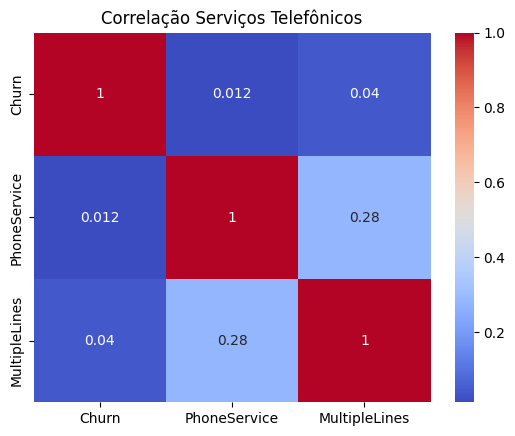

                  Churn  PhoneService  MultipleLines
Churn          1.000000      0.011942       0.040102
PhoneService   0.011942      1.000000       0.279690
MultipleLines  0.040102      0.279690       1.000000


In [ ]:
# Relação entre churn e Serviços Telefônicos
corr = df[['Churn', 'PhoneService', 'MultipleLines']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação Serviços Telefônicos')
plt.show()
print(corr)

In [ ]:
# Relação entre churn e Forma de pagamento
plt.figure(figsize=(5, 5))
corr = df[['Churn', 'PaymentMethod']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação: Churn / Forma de pagamento')
plt.show()

In [ ]:
df_filtrado = df[df["PaymentMethod"] == 0] # Electronic check
# Exibindo o resultado
print("Usuários de Cheque Eletrônico: ",df_filtrado.shape[0])
print("Soma de Churn: ",(df_filtrado["Churn"] == 1).sum())
divisao = round((df_filtrado["Churn"] == 1).sum() / df_filtrado.shape[0],2)*100
print("Divisão: ",divisao,"%")

df_filtrado = df[df["PaymentMethod"] == 1] # Mailed check
# Exibindo o resultado
print("\nUsuários de Cheque via Correio: ", df_filtrado.shape[0])
print("Soma de Churn: ",(df_filtrado["Churn"] == 1).sum())
divisao = round((df_filtrado["Churn"] == 1).sum() / df_filtrado.shape[0],2)*100
print("Divisão: ",divisao,"%")

df_filtrado = df[df["PaymentMethod"] == 2] # Bank transfer (automatic)
# Exibindo o resultado
print("\nUsuários de Transferência Bancária: ", df_filtrado.shape[0])
print("Soma de Churn: ",(df_filtrado["Churn"] == 1).sum())
divisao = round((df_filtrado["Churn"] == 1).sum() / df_filtrado.shape[0],2)*100
print("Divisão: ",divisao,"%")

df_filtrado = df[df["PaymentMethod"] == 3] # Credit Card (automatic)
# Exibindo o resultado
print("\nUsuários de Cartão de Crédito: ", df_filtrado.shape[0])
print("Soma de Churn: ",(df_filtrado["Churn"] == 1).sum())
divisao = round((df_filtrado["Churn"] == 1).sum() / df_filtrado.shape[0],2)*100
print("Divisão: ",divisao,"%")

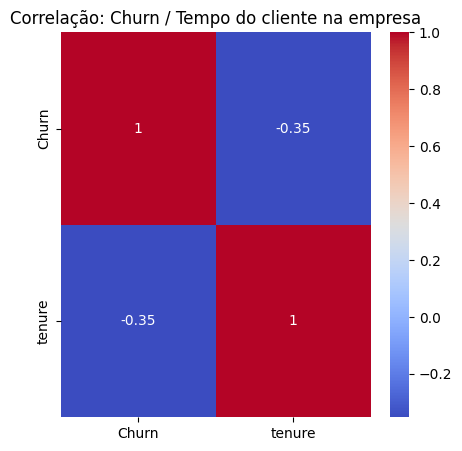

In [ ]:
# Relação entre churn e o Tempo do cliente na empresa (Churn/tenure)
plt.figure(figsize=(5, 5))
corr = df[['Churn', 'tenure']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação: Churn / Tempo do cliente na empresa')
plt.show()

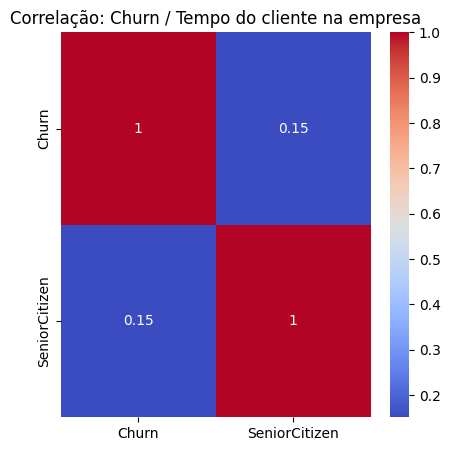

In [ ]:
# Relação entre churn e idade (Churn/SeniorCitizen)
plt.figure(figsize=(5, 5))
corr = df[['Churn', 'SeniorCitizen']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação: Churn / Tempo do cliente na empresa')
plt.show()

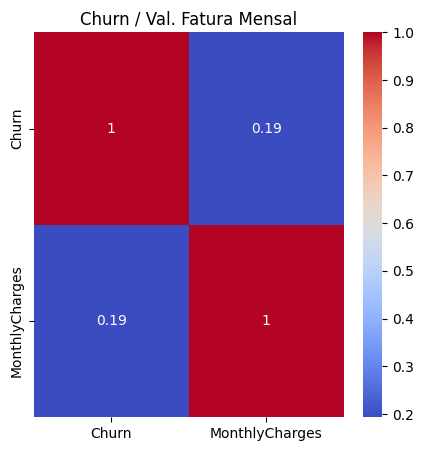

In [ ]:
# Relação entre churn e valor da fatura mensal (Churn/MonthlyCharges)
plt.figure(figsize=(5, 5))
corr = df[['Churn', 'MonthlyCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Churn / Val. Fatura Mensal')
plt.show()

In [ ]:
# Relação entre churn e valor total cobrado (Churn/TotalCharges)
plt.figure(figsize=(5, 5))
corr = df[['Churn', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Churn / Val. Total')
plt.show()

In [ ]:
# Relação entre Tempo do cliente na empresa / Valor total cobrado (tenure/TotalCharges)
plt.figure(figsize=(5, 5))
corr = df[['tenure', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Tenure / Val. Total')
plt.show()

In [ ]:
# Gráfico de Regressão - Tempo do cliente na empresa / Valor total cobrado (tenure/TotalCharges)
sns.regplot(x='tenure', y='TotalCharges', data=df, color='#278f65', scatter_kws={'alpha': 0.5, 'color': '#34c289'})
plt.title('Tempo do cliente na empresa / Valor total cobrado')
plt.xlabel('Tempo (meses)')
plt.ylabel('Valor cobrado')
plt.show()

In [ ]:
# Relação entre churn e Serviços extras
df_filtrado["AdditionalService"] = df[['DeviceProtection', 'OnlineSecurity', 'OnlineBackup','TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']].gt(0).any(axis=1).astype(int)
corr = df_filtrado[['Churn', 'AdditionalService']].corr()
print(corr,"\n")
print(df_filtrado[["Churn","AdditionalService",'DeviceProtection', 'OnlineSecurity', 'OnlineBackup','TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']].head().to_string())